# BREST CANCER PREDICTION WITH KNN and DECISION TREE

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score

# LOAD DATASET

Membaca Dataset

In [2]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Summary Statistic untuk Dataset

In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Cek Missing Value

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Drop Kolom Unnamed: 32 dan id

In [6]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

Melihat Jumlah Baris dan Kolom setelah Drop Kolom Unnamed: 32 dan id

In [7]:
df.shape

(569, 31)

Melihat unique value untuk kolom diagnosis

In [8]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

Encoding Value di Kolom diagnosis (B=0 dan M=1)

In [9]:
encoding = {
    'B':0,
    'M':1
}
df.diagnosis.replace(encoding, inplace=True)

Lihat sebaran data di kolom diagnosis

In [10]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

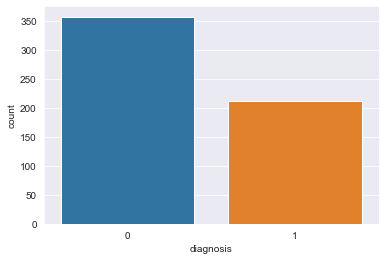

In [11]:
sns.set_style('darkgrid')
sns.countplot(x='diagnosis',data=df)

Lihat Deskripsi Akhir dari Dataset

In [12]:
df.describe() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# VISUALISASI DATA 

Korelasi Dataset

In [13]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


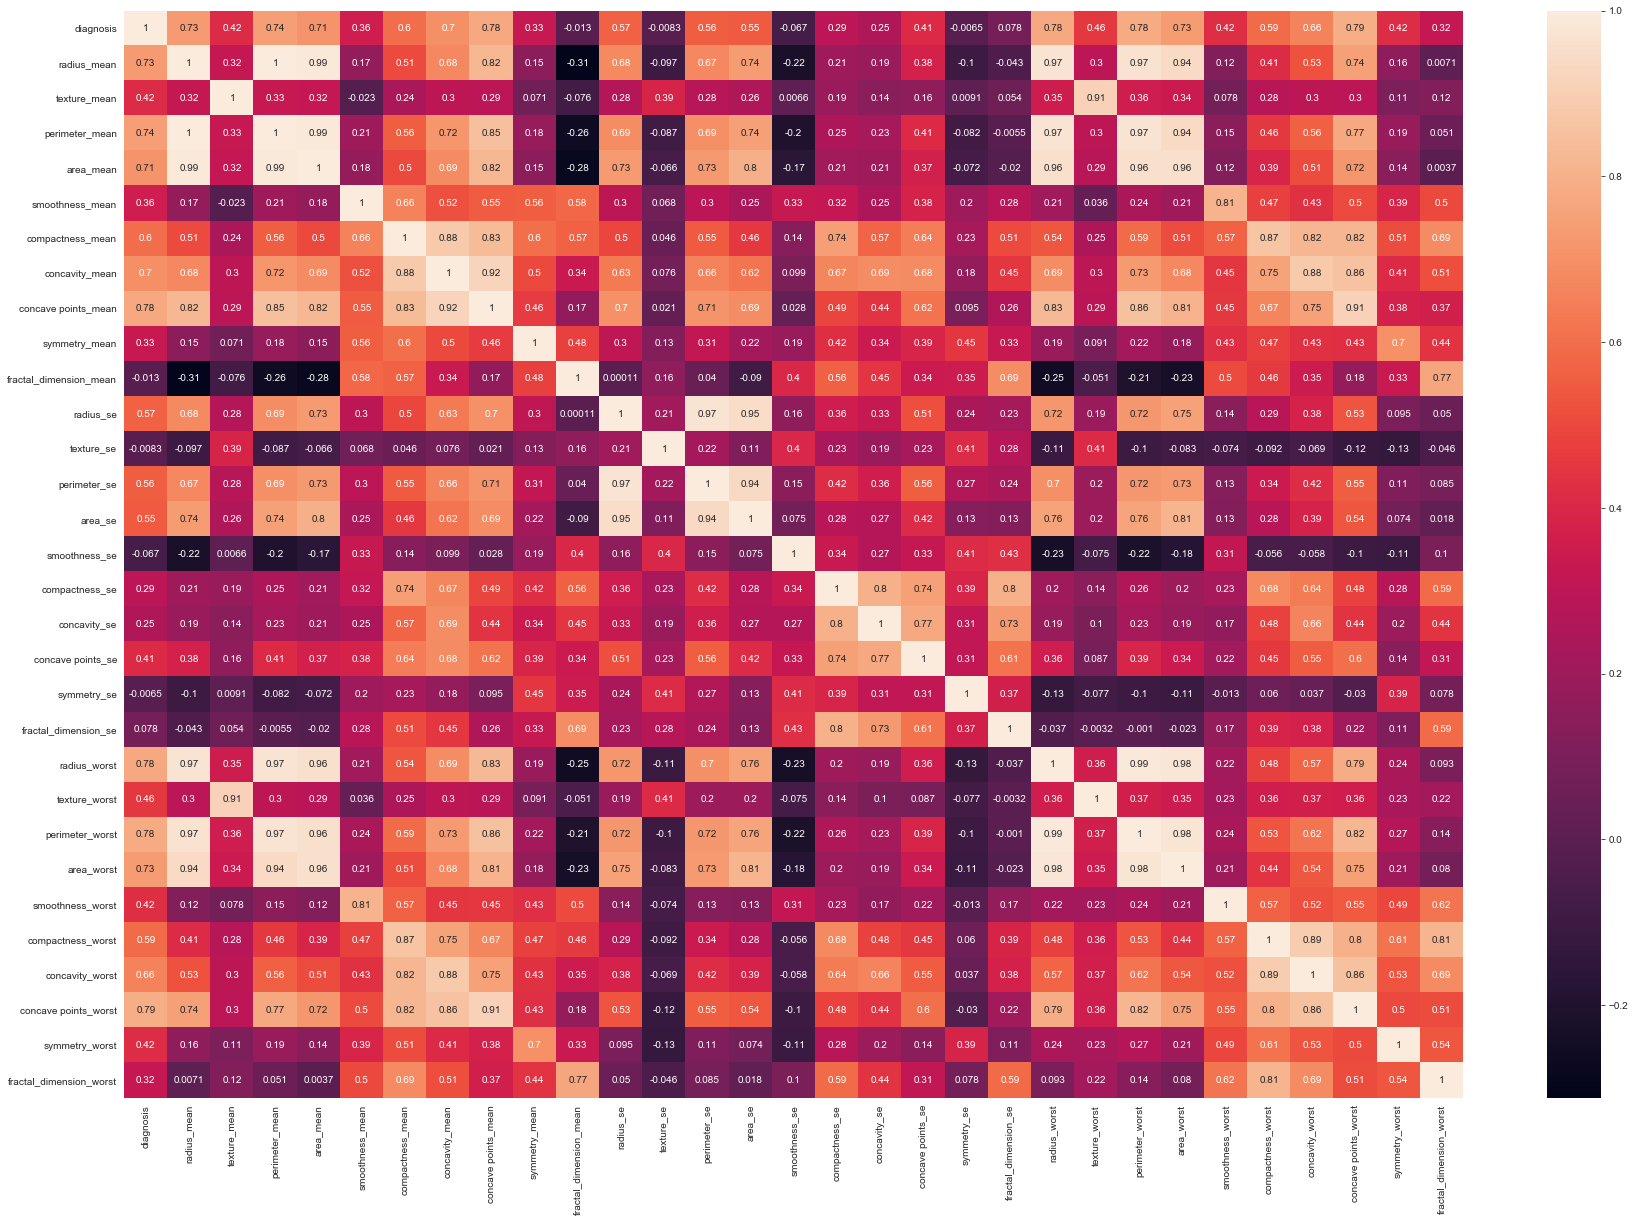

In [14]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),
           annot=True)

Korelasi Tertinggi Dataset

In [15]:
high_corr_data = df.corr()
high_corr_columns = high_corr_data.index[abs(high_corr_data['diagnosis'])>=0.5]
high_corr_columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

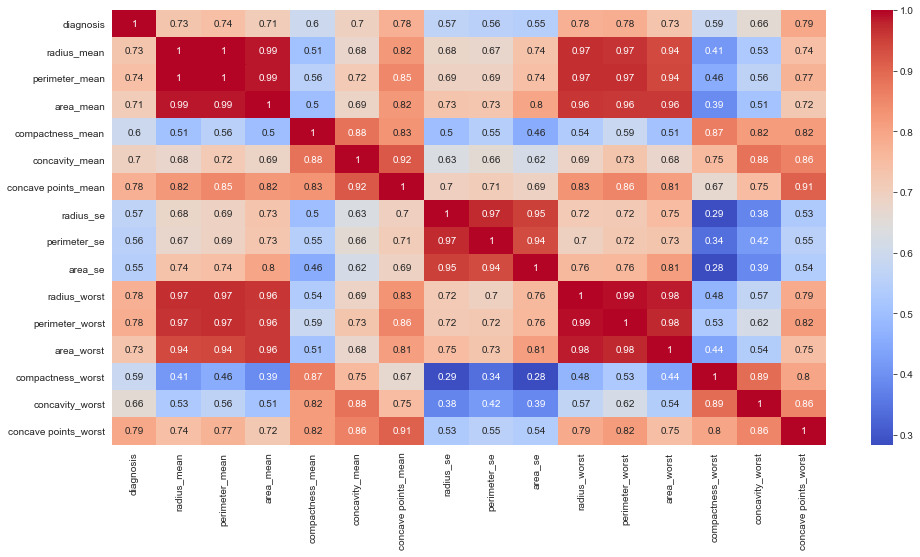

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(df[high_corr_columns].corr(), annot=True, cmap="coolwarm")

# Feature Selection

In [17]:
X = df.loc[:, df.columns != 'diagnosis']
y = df['diagnosis']
#apply SelectKBest class to extract top 10 best features
kbest = SelectKBest(score_func=chi2, k=10)
fit = kbest.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
fScores = pd.concat([df_columns,df_scores],axis=1)
fScores.columns = ['Feature','Score']  #naming the dataframe columns
print(fScores.nlargest(10,'Score')) 

            Feature          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508


[Text(0, 0.5, 'Importance'), Text(0.5, 0, 'Feature')]

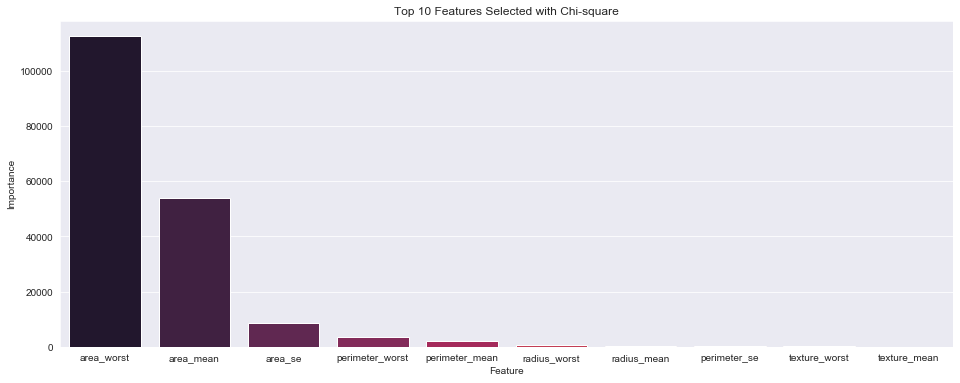

In [18]:
indices = np.argsort(kbest.scores_)[::-1]

features = []
for i in range(10):
    features.append(X.columns[indices[i]])

fig, ax = plt.subplots(figsize=(16,6))     
sns.barplot(x=features, y=kbest.scores_[indices[range(10)]],\
            label="Importtant Categorical Features", palette=("rocket"),ax=ax).set_title('Top 10 Features Selected with Chi-square')
ax.set(xlabel="Feature", ylabel = "Importance")

# Data Partitioning

In [19]:
# Getting Features

X= df.drop(columns = 'diagnosis')

# Getting Predicting Value
y = df['diagnosis']

In [20]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


Drop Kolom atau Feature yang tidak relevan

In [23]:
X_train = X_train.drop(['smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'], axis=1)

X_test = X_test.drop(['smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'], axis=1)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# KLASIFIKASI MENGGUNAKAN KNN

### Finding K value

In [25]:
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print ('n_neighbour : {} -> Prediction : {}'.format(i, acc))

n_neighbour : 1 -> Prediction : 0.9298245614035088
n_neighbour : 2 -> Prediction : 0.9590643274853801
n_neighbour : 3 -> Prediction : 0.9415204678362573
n_neighbour : 4 -> Prediction : 0.9590643274853801
n_neighbour : 5 -> Prediction : 0.9473684210526315
n_neighbour : 6 -> Prediction : 0.9473684210526315
n_neighbour : 7 -> Prediction : 0.9532163742690059
n_neighbour : 8 -> Prediction : 0.9532163742690059
n_neighbour : 9 -> Prediction : 0.9532163742690059
n_neighbour : 10 -> Prediction : 0.9590643274853801
n_neighbour : 11 -> Prediction : 0.9590643274853801
n_neighbour : 12 -> Prediction : 0.9649122807017544
n_neighbour : 13 -> Prediction : 0.9532163742690059
n_neighbour : 14 -> Prediction : 0.9590643274853801
n_neighbour : 15 -> Prediction : 0.9473684210526315
n_neighbour : 16 -> Prediction : 0.9532163742690059
n_neighbour : 17 -> Prediction : 0.9649122807017544
n_neighbour : 18 -> Prediction : 0.9590643274853801
n_neighbour : 19 -> Prediction : 0.9649122807017544


KNeighborsClassifier TERBAIK adalah dengan nilai tetangga : n_neighbors: 12, 17, dan 19

In [26]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(pred, y_test)
print (acc)

0.9649122807017544


In [27]:
# Evaluation metrics
from sklearn.metrics import confusion_matrix
conn1 = confusion_matrix(y_test, pred)
conn1

array([[105,   3],
       [  3,  60]], dtype=int64)

Text(34.0, 0.5, 'Predicted label')

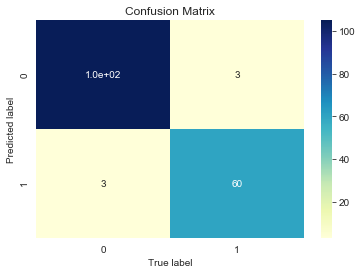

In [28]:
sns.heatmap(conn1,
           annot=True,
           cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f" Accuracy : {accuracy_score(y_test, pred)*100:.2f}%")
print(f" Precision : {precision_score(y_test, pred)*100:.2f}%")
print(f" Recall : {recall_score(y_test, pred)*100:.2f}%")
print(f" F1-Score : {f1_score(y_test, pred)*100:.2f}%")

 Accuracy : 96.49%
 Precision : 95.24%
 Recall : 95.24%
 F1-Score : 95.24%


# KLASIFIKASI MENGGUNATAN DT

In [31]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [32]:
y_pred=dtree.predict(X_test)

In [33]:
dtree.score(X_train, y_train)

0.9899497487437185

In [34]:
# Evaluation metrics
from sklearn.metrics import confusion_matrix
conn = confusion_matrix(y_test, y_pred)
conn

array([[99,  9],
       [ 1, 62]], dtype=int64)

Text(34.0, 0.5, 'Predicted label')

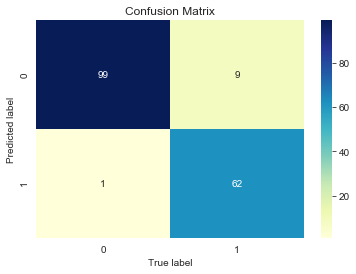

In [35]:
sns.heatmap(conn,
           annot=True,
           cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       108
           1       0.87      0.98      0.93        63

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171



In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f" Accuracy : {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f" Precision : {precision_score(y_test, y_pred)*100:.2f}%")
print(f" Recall : {recall_score(y_test, y_pred)*100:.2f}%")
print(f" F1-Score : {f1_score(y_test, y_pred)*100:.2f}%")

 Accuracy : 94.15%
 Precision : 87.32%
 Recall : 98.41%
 F1-Score : 92.54%
